## Library Import

In [2]:
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt 
% matplotlib inline

1.9.0


## Hellow World

In [3]:
h="Hello "
w="World!"
hw=h+w
print(hw)

Hello World!


In [8]:
h=tf.constant("Hello")
w=tf.constant(" World!")
hw=h+w
print(hw)

Tensor("Const_7:0", shape=(), dtype=string)
Tensor("add_2:0", shape=(), dtype=string)


In [9]:
h=tf.constant("Hello")
w=tf.constant(" World!")
hw=h+w

with tf.Session() as sess:
    ans=sess.run(hw)

print(ans)

b'Hello World!'


In [10]:
h=tf.constant("2") #""붙이면 string
w=tf.constant("3")
hw=h+w

with tf.Session() as sess:
    ans=sess.run(hw)

print(ans)

b'23'


In [12]:
x=tf.constant(8)
y=tf.constant(9)
z=tf.multiply(x,y)

sess=tf.Session()
out_z=sess.run(z)

print(out_z)

72


## First graph


In [30]:
a=tf.constant(5)
b=tf.constant(2)
c=tf.constant(3)
d=tf.multiply(a,b)
e=tf.add(c,b)
f=tf.subtract(d,e)
sess=tf.Session()
outs=sess.run(f)
sess.close()
print("out = ",outs)

out =  5


## Exercise 1 Make a Graph
![graph](./graph.PNG)

### graph A
#### a = 5, b = 2

In [57]:
a=tf.constant(5)
b=tf.constant(2)
c=tf.multiply(a,b)
d=tf.add(a,b)
e=tf.subtract(d,c)
f=tf.add(c,d)
g=tf.truediv(f,e)
sess=tf.Session()
out=sess.run(g)
sess.close()
print("out = ",out)

out =  -5.666666666666667


### graph B
#### a = 5, b = 2

In [5]:
a=tf.constant(5,dtype=tf.float64)
b=tf.constant(2,dtype=tf.float64)
c=tf.multiply(a,b)
d=tf.sin(c)
e=tf.subtract(b,d)
sess=tf.Session()
out=sess.run(e)
sess.close()
print("out = ",out)

out =  2.5440211108893696


## Construction and managing our graph

In [8]:
print(tf.get_default_graph())

g = tf.Graph()
print(g)

In [74]:
a = tf.constant(5) 

print(a.graph is g)
print(a.graph is tf.get_default_graph())

False
True


In [75]:
g1 = tf.get_default_graph() 
g2 = tf.Graph() 

print(g1 is tf.get_default_graph())

with g2.as_default(): 
    print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


## Fetches

In [76]:
#our first graph
a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.Session() 
outs = sess.run(f) 
sess.close() 
print("outs = {}".format(outs))

outs = 5


In [77]:
with tf.Session() as sess:
    fetches = [a,b,c,d,e,f]
    outs = sess.run(fetches) 

print("outs = {}".format(outs)) #전체그래프에 대한 점을 보여줌
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


## Nodes are operations, edges are Tensor objects

In [78]:
c = tf.constant(4.0)
print(c)

Tensor("Const_142:0", shape=(), dtype=float32)


## Data types

In [79]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_143:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [82]:
x = tf.constant([1,2,3],name='x',dtype=tf.float32) 
print(x.dtype)
x = tf.cast(x,tf.int64)
print(x.dtype)

sess=tf.Session()
out=sess.run(x)
sess.close()
print(out)

<dtype: 'float32'>
<dtype: 'int64'>
[1 2 3]


## Tensor arrays and Shapes

In [85]:
import numpy as np 

c = tf.constant([[1,2,3],
                 [4,5,6]]) 
print("Python List input: {}".format(c.get_shape()))

sess=tf.Session()
out=sess.run(c)
sess.close()
print(out)

c = tf.constant(np.array([
                 [[1,2,3], 
                  [4,5,6]], 

                 [[1,1,1], 
                  [2,2,2]]
                 ])) 

print("3d Numpy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
[[1 2 3]
 [4 5 6]]
3d Numpy array input: (2, 2, 3)


(1, 50000)


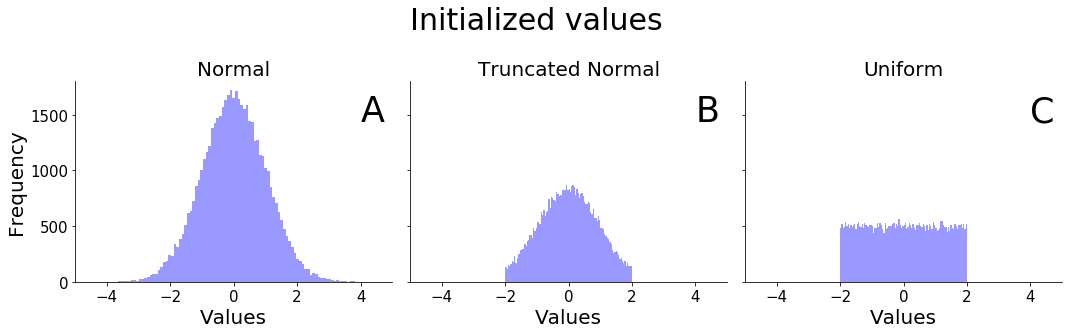

In [87]:
sess = tf.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

sess.close()


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1800])
    
    simpleaxis(ax)
    
    
axarr[0].set_ylabel('Frequency',fontsize=20)
plt.suptitle('Initialized values',fontsize=30, y=1.15)


for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

plt.savefig('histograms.png', bbox_inches='tight', format='png', dpi=200, pad_inches=0,transparent=True)

plt.show()

In [88]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5) #start, stop, numbering()
print("The content of 'c':\n {}\n".format(c.eval())) #Session run대신 eval로
sess.close()

The content of 'c':
 [0. 1. 2. 3. 4.]



## Matrix multiplication

In [95]:
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(A.get_shape()) #tensorflow shape() 대신 get_shape()

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)

sess = tf.InteractiveSession()
print(A.eval())
print(x.eval())
print('matmul result:\n {}'.format(b.eval()))
sess.close()

(2, 3)
(3,)
(3, 1)
[[1 2 3]
 [4 5 6]]
[[1]
 [0]
 [1]]
matmul result:
 [[ 4]
 [10]]


## Names

In [96]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
    c3 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)
print(c3.name)

c:0
c_1:0
c_2:0


## Name Scopes

In [98]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print(c1.name)
print(c2.name)
print(c3.name)

print(c2)
print(c3)

c:0
prefix_name/c:0
prefix_name/c_1:0
Tensor("prefix_name/c:0", shape=(), dtype=int32)
Tensor("prefix_name/c_1:0", shape=(), dtype=float64)


## Variables

In [100]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)
    print(init_val.eval())

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_1:0' shape=(1, 5) dtype=float32_ref>
[[ 2.2132409  0.9806119  0.7213672 -1.5998876 -1.0020298]]

post run: 
[[-0.1485797  -0.15691213 -1.5402303   0.52904624  1.3732673 ]]


## New variables are created each time

In [23]:
init_valinit_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_1:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 1.64751    -0.863329    0.62202734  2.369146   -0.6367952 ]]


## Placeholders

In [111]:
x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1) 

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32,shape=(5,10))
    w = tf.placeholder(tf.float32,shape=(10,1))
    b = tf.fill((5,1),-1.) 
    xw = tf.matmul(x,w)

    xwb = xw + b
    s = tf.reduce_max(xwb)
    
    with tf.Session() as sess:
        outs = sess.run(s,feed_dict={x: x_data,w: w_data}) #placeholder, x,w의 데이터를 대신 담아줌
print("outs = {}".format(outs))

outs = 4.866960525512695
